# Лабораторная работа №1. SGD и модификации

## Задачи работы:

1. Выбрать функции для тестовой оптимизации (выбраны функции Бута и Матьяса) и визуализировать их;
2. Реализовать SGD, SGD+LR Schedule;
3. Реализовать 1 моментный и 1 адаптивный методы.

### Импорт библиотек

In [1]:
from typing import Tuple, Mapping

import numpy as np
import random
from matplotlib import pyplot as plt
import sklearn as skl
from sklearn import datasets
from matplotlib.animation import FuncAnimation
from IPython import display
from mpl_toolkits.mplot3d import Axes3D  

## Функция Бута

$$f(x,y) = (x+2y-7)^2+(2x+y-5)^2$$

In [2]:
def Booth (x: np.float32, y: np.float32) -> np.float64:
    return np.square(x+2*y-7)+np.square(2*x+y-5)

def Booth_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([(10*x+8*y-34), (8*x+10*y-38)])

print('f(1, 3)=0')
print('Booth Result: ', Booth(1,3))
print('Booth Gradient Result: ', Booth_Grad(1,3))

f(1, 3)=0
Booth Result:  0
Booth Gradient Result:  [0 0]


## Функция Матьяса

$$f(x,y) = 0.26(x^2+y^2)-0.48xy$$

In [3]:
def Matyas (x: np.float32, y: np.float32) -> np.float64:
    return 0.26*(np.square(x)+np.square(y))-0.48*x*y

def Matyas_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([(0.52*x-0.48*y), (-0.48*x+0.52*y)])

print('f(0, 0)=0')
print('Booth Result: ', Matyas(0,0))
print('Booth Gradient Result: ', Matyas_Grad(0,0))

f(0, 0)=0
Booth Result:  0.0
Booth Gradient Result:  [0. 0.]


## GD, GD+LRS

In [4]:
def GD(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          T: int = 100) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    x_old = x0;
    y_old = y0;
    for i in range(T):
        n=df(x0, y0)
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)
    
def GD_LRS(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01, 
              T: int = 100, lre: int = 7, g: float = 0.1) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    x_old = x0;
    y_old = y0;
    for i in range(T):
        if ((i%lre)==0):
            lr *= g
        n=df(x0, y0)
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)

In [5]:
z, y = skl.datasets.make_blobs(n_samples=10, centers=2, n_features=2, random_state=0)
y = np.zeros(10)
x = np.zeros(10)
for i in range(len(z)):
    x[i],y[i] = z[i];
print('X: ', x)
print('Y: ', y)

X:  [ 1.12031365 -0.49772229  1.9263585   2.49913075  3.54934659  1.7373078
  2.91970372  2.84382807  0.87305123  2.36833522]
Y:  [5.75806083 1.55128226 4.15243012 1.23133799 0.6925054  4.42546234
 0.15549864 3.32650945 4.71438583 0.04356792]


## GD Booth

In [6]:
result = GD(Booth, Booth_Grad, x, y)
gd_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Booth Result: ', result[2])

X:  [ 0.88763742 -0.23205265  1.74152824  2.49071064  3.4790115   1.54954004
  2.95529346  2.63332451  0.74859524  2.46801627]
Y:  [5.47262966 1.81597181 3.96307843 1.28827373 0.71930713 4.22393149
 0.28637248 3.14635226 4.55310315 0.22974431]
Booth Result:  [28.40996548 26.26966281 13.10011971  5.34761668 11.50437913 14.38080748
 13.48722905 15.35816545  9.2530085  16.61269839]


Text(0.5, 0, 'Z Label')

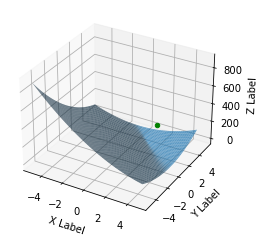

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Booth(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = GD(Booth, Booth_Grad, x, y)

ax.scatter(point[0][gd_ind], point[1][gd_ind], point[2][gd_ind], color = "green")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

## GD+LRS Booth

In [8]:
result = GD_LRS(Booth, Booth_Grad, x, y)
gds_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Booth Result: ', result[2])

X:  [ 1.12031365 -0.49772229  1.9263585   2.49913075  3.54934659  1.7373078
  2.91970372  2.84382807  0.87305123  2.36833522]
Y:  [5.75806083 1.55128226 4.15243012 1.23133799 0.6925054  4.42546234
 0.15549864 3.32650945 4.71438583 0.04356792]
Booth Result:  [40.76153362 39.06799079 19.47168367  5.66614673 12.05766895 21.28586454
 15.19745306 22.3477701  13.03506039 20.70103842]


Text(0.5, 0, 'Z Label')

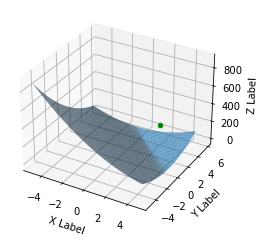

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Booth(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = GD_LRS(Booth, Booth_Grad, x, y)

ax.scatter(point[0][gds_ind], point[1][gds_ind], point[2][gds_ind], color = "green")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

## GD Matyas

In [10]:
result = GD(Matyas, Matyas_Grad, x, y)
gd_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Matyas Result: ', result[2])

X:  [ 1.14212671 -0.48768798  1.9362731   2.4920457   3.53421402  1.74951602
  2.90526765  2.84500741  0.89114041  2.35622901]
Y:  [5.73349642 1.54082652 4.140084   1.23693086 0.70594123 4.41078902
 0.16870462 3.32286197 4.69406167 0.05470938]
Matyas Result:  [5.74291089 1.03980878 1.58341678 0.53288098 2.1795709  2.15008707
 1.96668736 0.43751237 3.92749734 1.38237439]


Text(0.5, 0, 'Z Label')

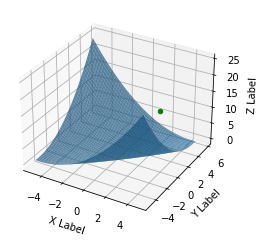

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Matyas(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = GD(Matyas, Matyas_Grad, x, y)

ax.scatter(point[0][gd_ind], point[1][gd_ind], point[2][gd_ind], color = "green")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

## GD+LRS Matyas

In [12]:
result = GD_LRS(Matyas, Matyas_Grad, x, y)
gds_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Booth Result: ', result[2])

X:  [ 1.12031365 -0.49772229  1.9263585   2.49913075  3.54934659  1.7373078
  2.91970372  2.84382807  0.87305123  2.36833522]
Y:  [5.75806083 1.55128226 4.15243012 1.23133799 0.6925054  4.42546234
 0.15549864 3.32650945 4.71438583 0.04356792]
Booth Result:  [5.85029509 1.0607048  1.60836543 0.5409886  2.22031849 2.18634107
 2.00477613 0.43897598 4.00115741 1.40930852]


Text(0.5, 0, 'Z Label')

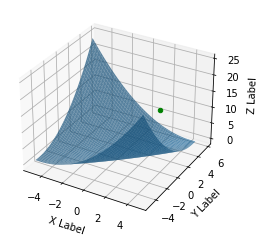

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Matyas(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = GD_LRS(Matyas, Matyas_Grad, x, y)

ax.scatter(point[0][gds_ind], point[1][gds_ind], point[2][gds_ind], color = "green")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

## Моментный метод Нестерова

In [14]:
def NAG(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01, 
              T: int = 100, lre: int = 7, g: float = 0.1, m: float = 0.1) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    x_old = x0;
    y_old = y0;
    n = np.zeros(df(x,y).shape)
    for i in range(T):
        if ((i%lre)==0):
            lr *= g
        n = m*n - lr*df(x+m*n[0], y+m*n[1])
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)

## Адаптивный метод

In [15]:
def Adam(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          T: int = 100, lre: int = 7, g: float = 0.1, mom: float = 0.9, mom_flat: float = 0.9) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    m=np.zeros(df(x0, y0).shape)
    Grad_SQRT=np.zeros((df(x0, y0)**2).shape)
    for i in range(T):
        if ((i%lre)==0):
            lr *= g
        m=mom*m-lr*(1-mom)*df(x0, y0)
        Grad_SQRT=mom_flat*Grad_SQRT+(1-mom_flat)*df(x0, y0)**2
        n=(lr*df(x0, y0)*m)/(Grad_SQRT+0.0000001)**0.5
        x_new = x0 - n[0]
        y_new = y0 - n[1]
        
    return x_new, y_new, f(x_new, y_new)

## NAG + ADAM Booth 

X:  [ 1.12031365 -0.49772229  1.9263585   2.49913075  3.54934659  1.7373078
  2.91970372  2.84382807  0.87305123  2.36833522]
Y:  [5.75806083 1.55128226 4.15243012 1.23133799 0.6925054  4.42546234
 0.15549864 3.32650945 4.71438583 0.04356792]
Booth NAG Result:  [40.76153362 39.06799079 19.47168367  5.66614673 12.05766895 21.28586454
 15.19745306 22.3477701  13.03506039 20.70103842]


Text(0.5, 0, 'Z Label')

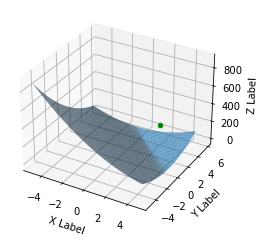

In [16]:
result = NAG(Booth, Booth_Grad, x, y)
nag_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Booth NAG Result: ', result[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Booth(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = NAG(Booth, Booth_Grad,x,y,lr=0.1,lre=20)

ax.scatter(point[0][nag_ind], point[1][nag_ind], point[2][nag_ind], color = "green")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

X:  [ 1.12033692 -0.49769572  1.92637698  2.4991316   3.54935363  1.73732658
  2.91970728  2.84384912  0.87306367  2.36834519]
Y:  [5.75808938 1.55130873 4.15244906 1.23134368 0.69250808 4.4254825
 0.15551173 3.32652747 4.71440196 0.04358654]
Booth ADAM Result:  [40.76288992 39.06658419 19.47238394  5.66611502 12.05771124 21.28662337
 15.19726909 22.3485379  13.03547547 20.70059238]


Text(0.5, 0, 'Z Label')

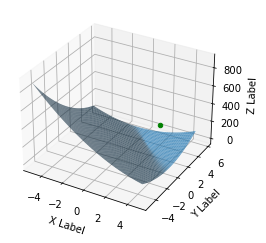

In [17]:
result = Adam(Booth,Booth_Grad,x,y,lr=0.1,lre=50,mom=0.8,mom_flat=0.9)
adm_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Booth ADAM Result: ', result[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Booth(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = Adam(Booth,Booth_Grad,x,y,lr=0.1,lre=50,mom=0.8,mom_flat=0.9)

ax.scatter(point[0][adm_ind], point[1][adm_ind], point[2][adm_ind], color = "green")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

## NAG+ADAM Matyas

X:  [ 1.12031365 -0.49772229  1.9263585   2.49913075  3.54934659  1.7373078
  2.91970372  2.84382807  0.87305123  2.36833522]
Y:  [5.75806083 1.55128226 4.15243012 1.23133799 0.6925054  4.42546234
 0.15549864 3.32650945 4.71438583 0.04356792]
Matyas NAG Result:  [5.85029509 1.0607048  1.60836543 0.5409886  2.22031849 2.18634107
 2.00477613 0.43897598 4.00115741 1.40930852]


Text(0.5, 0, 'Z Label')

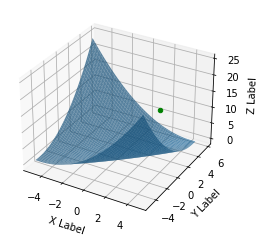

In [18]:
result = NAG(Matyas, Matyas_Grad, x, y)
nag_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Matyas NAG Result: ', result[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Matyas(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = NAG(Matyas, Matyas_Grad,x,y,lr=0.1,lre=20)

ax.scatter(point[0][nag_ind], point[1][nag_ind], point[2][nag_ind], color = "green")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

X:  [ 1.12031583 -0.49772129  1.92635949  2.49913146  3.54934811  1.73730902
  2.91970516  2.84382819  0.87305304  2.36833643]
Y:  [5.75806329 1.5512833  4.15243135 1.23133855 0.69250674 4.42546381
 0.15549996 3.32650981 4.71438786 0.04356903]
Matyas ADAM Result:  [5.85029637 1.06070488 1.60836597 0.54098878 2.22031898 2.18634173
 2.00477647 0.4389761  4.00115827 1.40930874]


Text(0.5, 0, 'Z Label')

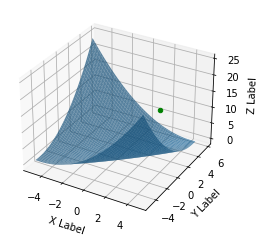

In [19]:
result = Adam(Matyas,Matyas_Grad,x,y,lr=0.1,lre=50,mom=0.8,mom_flat=0.9)
adm_ind = 0
print('X: ', result[0])
print('Y: ', result[1])
print('Matyas ADAM Result: ', result[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
c = np.array(Matyas(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.7)

point = Adam(Matyas,Matyas_Grad,x,y,lr=0.1,lre=50,mom=0.8,mom_flat=0.9)

ax.scatter(point[0][adm_ind], point[1][adm_ind], point[2][adm_ind], color = "green")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')